In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
winedata=pd.read_csv('WineQT.csv')
winedata.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2


In [5]:
winedata.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# Data Exploration and Preprocessing

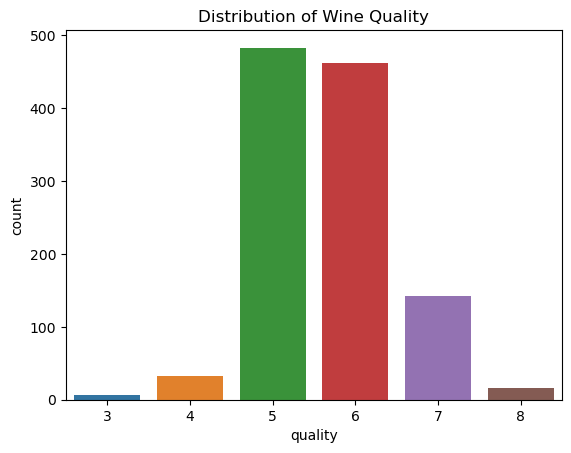

In [7]:
# Visualize the distribution of wine quality
sns.countplot(x='quality', data=winedata)
plt.title('Distribution of Wine Quality')
plt.show()

# Feature Selection and Data Splitting

In [9]:
# Select features and target variable
X = winedata.drop('quality', axis=1)  # Features
y = winedata['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Classifier Models

In [11]:
# Train Random Forest Classifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions, zero_division=0))  # Set zero_division to 0

Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.74      0.73        96
           6       0.63      0.68      0.65        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.65      0.67      0.66       229



In [12]:
# Train Support Vector Classifier with class weights
svc_model = SVC(class_weight='balanced', random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_predictions, zero_division=0))  # Set zero_division to 0

Support Vector Classifier Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.05      0.33      0.09         6
           5       0.00      0.00      0.00        96
           6       0.00      0.00      0.00        99
           7       0.14      0.42      0.21        26
           8       0.01      0.50      0.03         2

    accuracy                           0.06       229
   macro avg       0.04      0.21      0.06       229
weighted avg       0.02      0.06      0.03       229



In [24]:
# Train Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(class_weight='balanced',random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions
sgd_predictions = sgd_model.predict(X_test)

# Evaluate the model
print("SGD Classifier Report:")
print(classification_report(y_test, sgd_predictions,zero_division=0))

SGD Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.79      0.11      0.20        96
           6       0.39      0.41      0.40        99
           7       0.00      0.00      0.00        26
           8       0.02      1.00      0.04         2

    accuracy                           0.24       229
   macro avg       0.24      0.31      0.13       229
weighted avg       0.50      0.24      0.26       229



## Model Evaluation

In [25]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_predictions))
print("SVC Accuracy:", accuracy_score(y_test, svc_predictions))

Random Forest Accuracy: 0.6724890829694323
SGD Classifier Accuracy: 0.23580786026200873
SVC Accuracy: 0.0611353711790393


### Data Visualization

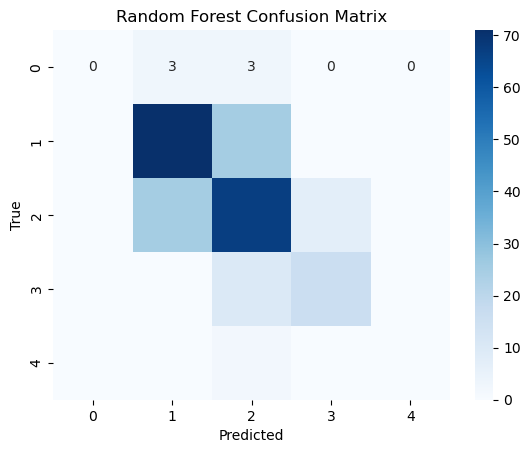

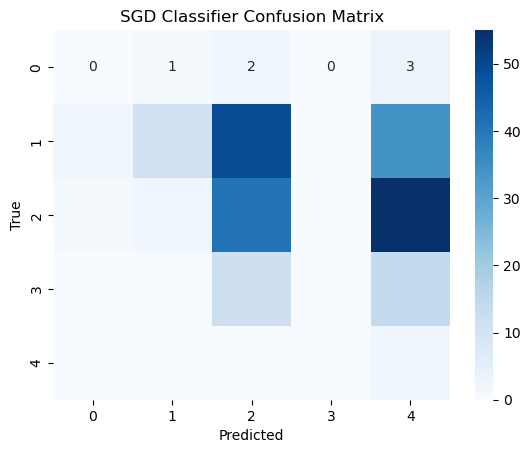

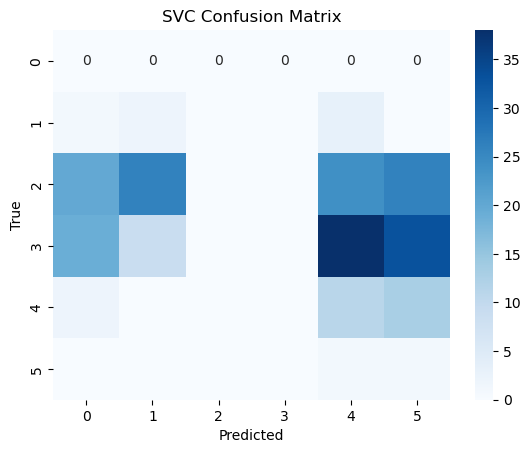

In [18]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, rf_predictions, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, sgd_predictions, "SGD Classifier Confusion Matrix")
plot_confusion_matrix(y_test, svc_predictions, "SVC Confusion Matrix")